# Random Forest Regression

Random Forest Regression is an ensemble learning method that combines multiple decision trees to improve the predictive performance and control overfitting. It leverages the power of multiple trees to provide a more robust and accurate prediction model.

### Key Concepts

1. **Ensemble Learning**: The process of combining multiple models (in this case, decision trees) to produce a better performance than any single model.

2. **Bootstrap Aggregating (Bagging)**: Random Forest creates multiple decision trees using different subsets of the training data sampled with replacement (bootstrap samples). Each tree is trained independently.

3. **Random Subspace Method**: When splitting nodes, Random Forest considers a random subset of features rather than all features, which helps in reducing the correlation between trees.

4. **Aggregation**: The predictions from all the individual trees are averaged to make the final prediction in regression tasks.

### Advantages and Disadvantages

**Advantages**:
- Reduces overfitting by averaging multiple trees.
- Handles large datasets efficiently.
- Provides feature importance, helping in feature selection.

**Disadvantages**:
- Can be computationally intensive and require more memory.
- Less interpretable compared to a single decision tree.

### Implementation Steps

1. **Train Multiple Trees**: Create multiple decision trees using different subsets of the training data and different subsets of features.
2. **Make Predictions**: For a given input, collect the predictions from all the trees.
3. **Average Predictions**: Average the predictions to get the final output.

### Implementation in Python

Here’s an example using `scikit-learn`:

```python
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data
X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7]])
y = np.array([1, 2, 3, 4, 5])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

print("Predictions:", y_pred)
print("Actual values:", y_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
```

### Tuning Hyperparameters

- **`n_estimators`**: The number of trees in the forest. More trees can improve performance but increase computational cost.
- **`max_depth`**: The maximum depth of the trees. Limiting depth can prevent overfitting.
- **`min_samples_split`**: The minimum number of samples required to split an internal node.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node.
- **`max_features`**: The number of features to consider when looking for the best split.

### Feature Importance

Random Forest can also be used to assess the importance of features in predicting the target variable. This can be accessed through the `feature_importances_` attribute of the fitted model.

```python
importances = rf.feature_importances_
for i, v in enumerate(importances):
    print(f'Feature: {i}, Score: {v}')
```

### Summary

Random Forest Regression is a powerful and flexible method for predicting continuous values, offering improved accuracy and robustness over individual decision trees. By averaging the predictions of multiple trees, it reduces the risk of overfitting and provides a reliable model for various regression tasks.

## Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [11]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Random Forest Regression model on the whole dataset

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting a new result

In [13]:
regressor.predict([[6.5]])

array([167000.])

## Visualising the Random Forest Regression results (higher resolution)

C:\Users\vm23055\AppData\Local\Temp\ipykernel_13392\230117209.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


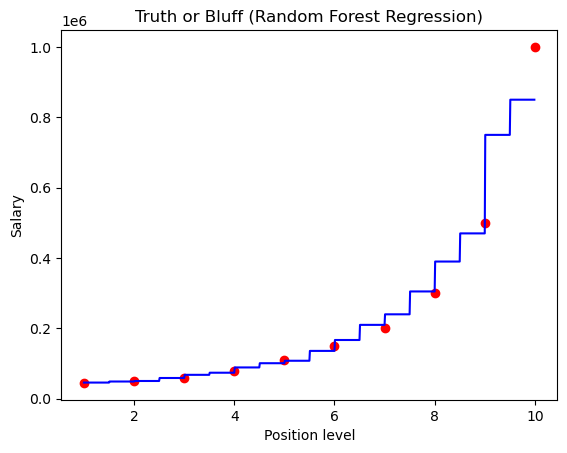

In [14]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [20]:
y_pred=regressor.predict(X)

In [21]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [22]:
np.set_printoptions(precision=2)
print(np.concatenate((y.reshape(len(y),1),y_pred.reshape(len(y_pred),1) ),1))

[[  45000.   46000.]
 [  50000.   49000.]
 [  60000.   59000.]
 [  80000.   74000.]
 [ 110000.  101000.]
 [ 150000.  136000.]
 [ 200000.  210000.]
 [ 300000.  305000.]
 [ 500000.  470000.]
 [1000000.  850000.]]
